<a href="https://colab.research.google.com/github/sp-au-mu-nl/PythonMedia/blob/main/notebook/chap06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!wget https://github.com/sp-au-mu-nl/PythonMedia/raw/refs/heads/main/data/chap06.zip
!unzip chap06.zip
!rm chap06.zip
!wget https://github.com/sp-au-mu-nl/PythonMedia/raw/refs/heads/main/src/cis.py

--2025-06-26 07:08:01--  https://github.com/sp-au-mu-nl/PythonMedia/raw/refs/heads/main/data/chap06.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sp-au-mu-nl/PythonMedia/refs/heads/main/data/chap06.zip [following]
--2025-06-26 07:08:01--  https://raw.githubusercontent.com/sp-au-mu-nl/PythonMedia/refs/heads/main/data/chap06.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 249337 (243K) [application/zip]
Saving to: ‘chap06.zip’

chap06.zip          100%[===================>] 243.49K  --.-KB/s    in 0.006s  

2025-06-26 07:08:01 (42.2 MB/s) - ‘chap06.zip’ saved [249337/249337]

Archive:  c

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal, ndimage
import cv2
import cis

In [3]:
signal.convolve2d([[1,2],[3,4]],[[5,6],[7,8]])

array([[ 5, 16, 12],
       [22, 60, 40],
       [21, 52, 32]])

In [4]:
np.convolve([1,2],[5,6])

array([ 5, 16, 12])

In [5]:
np.convolve([3,4],[7,8])

array([21, 52, 32])

In [6]:
np.convolve([1,2],[7,8])+np.convolve([3,4],[5,6])

array([22, 60, 40])

In [7]:
G=np.uint8(180*np.ones((256,256)))
for k in np.arange(31,256,32):
  G[:,k-2:k]=50
  G[k-2:k,:]=50

fG=np.uint8(signal.convolve2d(np.double(G),np.ones((3,1))/3))
fG.shape

(258, 256)

In [8]:
fG=fG[1:-1,:]
fG.shape

(256, 256)

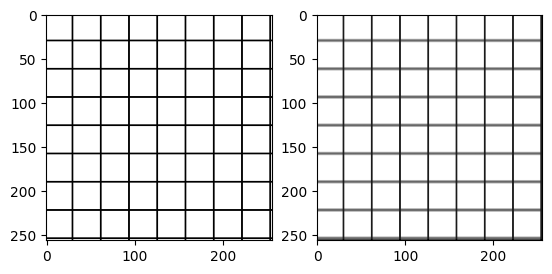

In [9]:
plt.subplot(121); plt.imshow(G,cmap='gray')
plt.subplot(122); plt.imshow(fG,cmap='gray')

In [10]:
signal.convolve2d(np.ones((1,3))/3,np.ones((3,1))/3)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

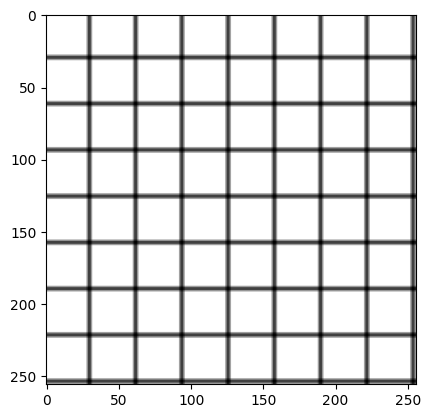

In [11]:
fG=ndimage.convolve(G,np.ones((3,3))/9)
plt.imshow(fG,cmap='gray')

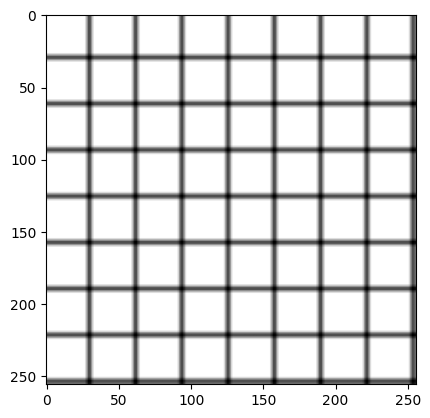

In [12]:
plt.imshow(ndimage.uniform_filter(fG,3),cmap='gray')

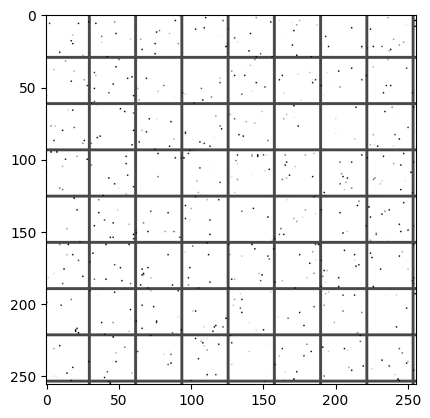

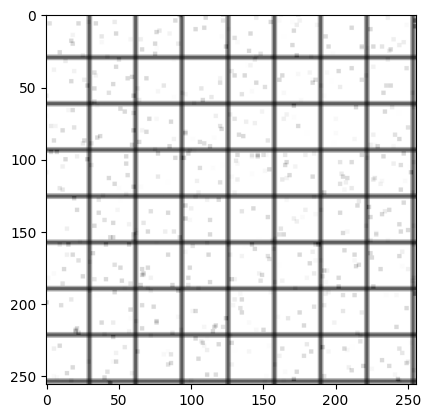

In [13]:
N=np.random.poisson(0.01,G.shape)*np.random.standard_normal(G.shape)*80
NG=cv2.subtract(G,np.uint8(N))
plt.imshow(NG,cmap='gray')
fNG=ndimage.uniform_filter(NG,3)
plt.figure(); plt.imshow(fNG,cmap='gray')

In [14]:
#import plotly.graph_objects as go
#
#def mesh3(z):
#    data = [ go.Surface(z = z) ]
#    fig = go.Figure(data = data)
#    fig.update_layout(
#        width=600, height=600,
#        showlegend=False)
#    return fig

In [15]:
G=cv2.imread('cyclist-394274_640.jpg',0)
cis.mesh(G)

In [16]:
#import plotly.graph_objects as go
#
#def mesh2(z):
#    data = [ go.Surface(z = z, showscale=False) ]
#    fig = go.Figure(data = data)
#    fig.update_layout(
#        width=600, height=600,
#        showlegend=False)
#    fig.show()

In [17]:
signal.convolve2d([[1],[2],[1]],[[1,0,-1]])

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

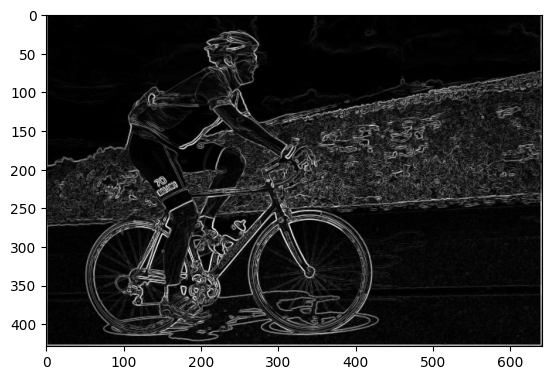

In [18]:
fsx=signal.convolve2d([[1],[2],[1]],[[1,0,-1]])
gx=signal.fftconvolve(fsx,G)
fsy=fsx.T
gy=signal.fftconvolve(fsy,G)
gxy=np.hypot(gx,gy)
plt.imshow(gxy,cmap='gray')

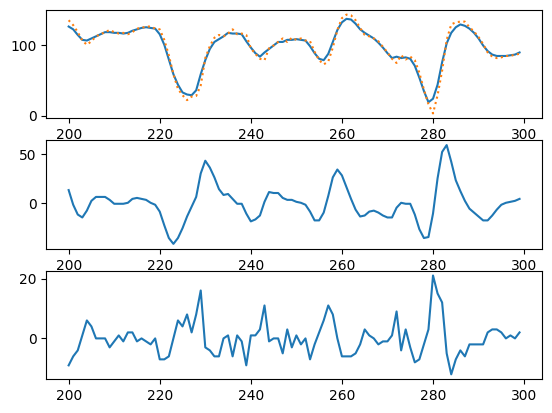

In [19]:
G=cv2.imread('rose.jpeg',0)
y=G[300,:]
y1=signal.lfilter([1,0,-1],1,np.double(y))
y2=signal.lfilter([1,-2,1],1,np.double(y))
r=np.arange(200,300)
plt.subplot(311); plt.plot(r,y[r])
plt.plot(r,np.double(y[r]-y2[r]),':')
plt.subplot(312); plt.plot(r,y1[r])
plt.subplot(313); plt.plot(r,y2[r])

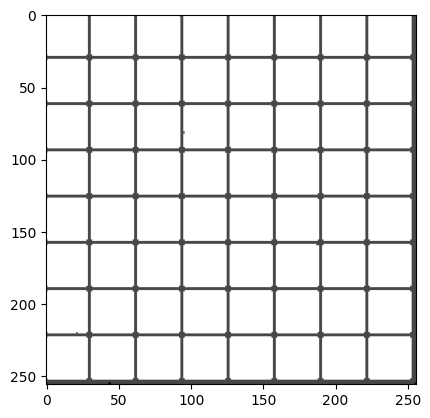

In [20]:
plt.imshow(signal.medfilt2d(NG,3),cmap='gray')